## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


In [2]:
import os
import tarfile

def recursive_files(dir_name='.', ignore=None):
    for dir_name,subdirs,files in os.walk(dir_name):
        if ignore and os.path.basename(dir_name) in ignore:
            continue

        for file_name in files:
            if ignore and file_name in ignore:
                continue

            yield os.path.join(dir_name, file_name)

def make_tar_file(dir_name='.', target_file_name='workspace_archive.tar', ignore=None):
    tar = tarfile.open(target_file_name, 'w')

    for file_name in recursive_files(dir_name, ignore):
        tar.add(file_name)

    tar.close()


dir_name = '.'
target_file_name = 'workspace_archive.tar'
# List of files/directories to ignore
ignore = {'.ipynb_checkpoints', '__pycache__', target_file_name}

make_tar_file(dir_name, target_file_name, ignore)

## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [11]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2020-06-18 21:39:42--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.29.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.29.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  83.9MB/s    in 4.0s    

2020-06-18 21:39:47 (81.4 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

  inflating: /data/test/Baburam_Bhattari_30.jpg  
  inflating: /data/test/Baburam_Bhattari_31.jpg  
  inflating: /data/test/Barbara_Bodine_00.jpg  
  inflating: /data/test/Barbara_Bodine_01.jpg  
  inflating: /data/test/Barbara_Bodine_20.jpg  
  inflating: /data/test/Barbara_Bodine_21.jpg  
  inflating: /data/test/Barbara_Bodine_40.jpg  
  inflating: /data/test/Barbara_Bodine_41.jpg  
  inflating: /data/test/Barbara_Bodine_50.jpg  
  inflating: /data/test/Barbara_Bodine_51.jpg  
  inflating: /data/test/Barbara_Boxer_10.jpg  
  inflating: /data/test/Barbara_Boxer_11.jpg  
  inflating: /data/test/Barbara_Boxer_40.jpg  
  inflating: /data/test/Barbara_Boxer_41.jpg  
  inflating: /data/test/Barbara_Boxer_50.jpg  
  inflating: /data/test/Barbara_Boxer_51.jpg  
  inflating: /data/test/Barbara_Walters_00.jpg  
  inflating: /data/test/Barbara_Walters_01.jpg  
  inflating: /data/test/Barbara_Walters_20.jpg  
  inflating: /data/test/Barbara_Walters_21.jpg  
  inflating: /data/test/Barbara_Walter

  inflating: /data/test/Charlotte_Casiraghi_10.jpg  
  inflating: /data/test/Charlotte_Casiraghi_11.jpg  
  inflating: /data/test/Charlotte_Casiraghi_20.jpg  
  inflating: /data/test/Charlotte_Casiraghi_21.jpg  
  inflating: /data/test/Charlotte_Rampling_00.jpg  
  inflating: /data/test/Charlotte_Rampling_01.jpg  
  inflating: /data/test/Charlotte_Rampling_30.jpg  
  inflating: /data/test/Charlotte_Rampling_31.jpg  
  inflating: /data/test/Charlotte_Rampling_40.jpg  
  inflating: /data/test/Charlotte_Rampling_41.jpg  
  inflating: /data/test/Charlotte_Rampling_50.jpg  
  inflating: /data/test/Charlotte_Rampling_51.jpg  
  inflating: /data/test/Cherie_Blair_00.jpg  
  inflating: /data/test/Cherie_Blair_01.jpg  
  inflating: /data/test/Cherie_Blair_20.jpg  
  inflating: /data/test/Cherie_Blair_21.jpg  
  inflating: /data/test/Cherie_Blair_30.jpg  
  inflating: /data/test/Cherie_Blair_31.jpg  
  inflating: /data/test/Cherie_Blair_40.jpg  
  inflating: /data/test/Cherie_Blair_41.jpg  
  in

  inflating: /data/test/Dan_Ackroyd_20.jpg  
  inflating: /data/test/Dan_Ackroyd_21.jpg  
  inflating: /data/test/Dan_Ackroyd_30.jpg  
  inflating: /data/test/Dan_Ackroyd_31.jpg  
  inflating: /data/test/Daniel_Radcliffe_00.jpg  
  inflating: /data/test/Daniel_Radcliffe_01.jpg  
  inflating: /data/test/Daniel_Radcliffe_20.jpg  
  inflating: /data/test/Daniel_Radcliffe_21.jpg  
  inflating: /data/test/Daniel_Radcliffe_50.jpg  
  inflating: /data/test/Daniel_Radcliffe_51.jpg  
  inflating: /data/test/Daniel_Rouse_00.jpg  
  inflating: /data/test/Daniel_Rouse_01.jpg  
  inflating: /data/test/Daniel_Rouse_10.jpg  
  inflating: /data/test/Daniel_Rouse_11.jpg  
  inflating: /data/test/Daniel_Rouse_20.jpg  
  inflating: /data/test/Daniel_Rouse_21.jpg  
  inflating: /data/test/Daniel_Rouse_30.jpg  
  inflating: /data/test/Daniel_Rouse_31.jpg  
  inflating: /data/test/Daniell_Sunjata_10.jpg  
  inflating: /data/test/Daniell_Sunjata_11.jpg  
  inflating: /data/test/Daniell_Sunjata_20.jpg  
  inf

  inflating: /data/test/Erin_Hershey_Presley_11.jpg  
  inflating: /data/test/Erin_Hershey_Presley_30.jpg  
  inflating: /data/test/Erin_Hershey_Presley_31.jpg  
  inflating: /data/test/Erin_Hershey_Presley_40.jpg  
  inflating: /data/test/Erin_Hershey_Presley_41.jpg  
  inflating: /data/test/Ernest_Hollings_00.jpg  
  inflating: /data/test/Ernest_Hollings_01.jpg  
  inflating: /data/test/Ernest_Hollings_10.jpg  
  inflating: /data/test/Ernest_Hollings_11.jpg  
  inflating: /data/test/Ernest_Hollings_20.jpg  
  inflating: /data/test/Ernest_Hollings_21.jpg  
  inflating: /data/test/Ernesto_Zedillo_10.jpg  
  inflating: /data/test/Ernesto_Zedillo_11.jpg  
  inflating: /data/test/Ernesto_Zedillo_20.jpg  
  inflating: /data/test/Ernesto_Zedillo_21.jpg  
  inflating: /data/test/Ernesto_Zedillo_30.jpg  
  inflating: /data/test/Ernesto_Zedillo_31.jpg  
  inflating: /data/test/Ernesto_Zedillo_40.jpg  
  inflating: /data/test/Ernesto_Zedillo_41.jpg  
  inflating: /data/test/Ernie_Grunfeld_20.jp

  inflating: /data/test/Isabella_Rossellini_01.jpg  
  inflating: /data/test/Isabella_Rossellini_10.jpg  
  inflating: /data/test/Isabella_Rossellini_11.jpg  
  inflating: /data/test/Isabella_Rossellini_20.jpg  
  inflating: /data/test/Isabella_Rossellini_21.jpg  
  inflating: /data/test/Isabelle_Huppert_20.jpg  
  inflating: /data/test/Isabelle_Huppert_21.jpg  
  inflating: /data/test/Isabelle_Huppert_30.jpg  
  inflating: /data/test/Isabelle_Huppert_31.jpg  
  inflating: /data/test/Isabelle_Huppert_40.jpg  
  inflating: /data/test/Isabelle_Huppert_41.jpg  
  inflating: /data/test/Itzhak_Perlman_10.jpg  
  inflating: /data/test/Itzhak_Perlman_11.jpg  
  inflating: /data/test/Itzhak_Perlman_30.jpg  
  inflating: /data/test/Itzhak_Perlman_31.jpg  
  inflating: /data/test/Itzhak_Perlman_40.jpg  
  inflating: /data/test/Itzhak_Perlman_41.jpg  
  inflating: /data/test/Jack_Welch_10.jpg  
  inflating: /data/test/Jack_Welch_11.jpg  
  inflating: /data/test/Jack_Welch_30.jpg  
  inflating: /d

  inflating: /data/test/Kieran_Culkin_00.jpg  
  inflating: /data/test/Kieran_Culkin_01.jpg  
  inflating: /data/test/Kieran_Culkin_10.jpg  
  inflating: /data/test/Kieran_Culkin_11.jpg  
  inflating: /data/test/Kieran_Culkin_20.jpg  
  inflating: /data/test/Kieran_Culkin_21.jpg  
  inflating: /data/test/Kirk_Ferentz_00.jpg  
  inflating: /data/test/Kirk_Ferentz_01.jpg  
  inflating: /data/test/Kirk_Ferentz_20.jpg  
  inflating: /data/test/Kirk_Ferentz_21.jpg  
  inflating: /data/test/Kirk_Ferentz_40.jpg  
  inflating: /data/test/Kirk_Ferentz_41.jpg  
  inflating: /data/test/Kirk_Ferentz_50.jpg  
  inflating: /data/test/Kirk_Ferentz_51.jpg  
  inflating: /data/test/Kirsten_Dunst_00.jpg  
  inflating: /data/test/Kirsten_Dunst_01.jpg  
  inflating: /data/test/Kirsten_Dunst_20.jpg  
  inflating: /data/test/Kirsten_Dunst_21.jpg  
  inflating: /data/test/Kirsten_Dunst_30.jpg  
  inflating: /data/test/Kirsten_Dunst_31.jpg  
  inflating: /data/test/Kit_Bond_10.jpg  
  inflating: /data/test/Ki

  inflating: /data/test/Lisa_Ling_10.jpg  
  inflating: /data/test/Lisa_Ling_11.jpg  
  inflating: /data/test/Lisa_Ling_20.jpg  
  inflating: /data/test/Lisa_Ling_21.jpg  
  inflating: /data/test/Liu_Ye_00.jpg  
  inflating: /data/test/Liu_Ye_01.jpg  
  inflating: /data/test/Liu_Ye_10.jpg  
  inflating: /data/test/Liu_Ye_11.jpg  
  inflating: /data/test/Liu_Ye_20.jpg  
  inflating: /data/test/Liu_Ye_21.jpg  
  inflating: /data/test/Liu_Ye_50.jpg  
  inflating: /data/test/Liu_Ye_51.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_00.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_01.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_30.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_31.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_40.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_41.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_50.jpg  
  inflating: /data/test/Loretta_Lynn_Harper_51.jpg  
  inflating: /data/test/Louis_Van_Gaal_00.jpg  
  inflating: /data/test/Louis_Van_Ga

  inflating: /data/test/Mark_Leno_30.jpg  
  inflating: /data/test/Mark_Leno_31.jpg  
  inflating: /data/test/Martin_Luther_King_III_00.jpg  
  inflating: /data/test/Martin_Luther_King_III_01.jpg  
  inflating: /data/test/Martin_Luther_King_III_30.jpg  
  inflating: /data/test/Martin_Luther_King_III_31.jpg  
  inflating: /data/test/Martin_Luther_King_III_50.jpg  
  inflating: /data/test/Martin_Luther_King_III_51.jpg  
  inflating: /data/test/Martin_Sheen_00.jpg  
  inflating: /data/test/Martin_Sheen_01.jpg  
  inflating: /data/test/Martin_Sheen_30.jpg  
  inflating: /data/test/Martin_Sheen_31.jpg  
  inflating: /data/test/Martin_Sheen_40.jpg  
  inflating: /data/test/Martin_Sheen_41.jpg  
  inflating: /data/test/Martin_Sheen_50.jpg  
  inflating: /data/test/Martin_Sheen_51.jpg  
  inflating: /data/test/Mary_Landrieu_00.jpg  
  inflating: /data/test/Mary_Landrieu_01.jpg  
  inflating: /data/test/Mary_Landrieu_20.jpg  
  inflating: /data/test/Mary_Landrieu_21.jpg  
  inflating: /data/tes

  inflating: /data/test/Philippe_Gagnon_30.jpg  
  inflating: /data/test/Philippe_Gagnon_31.jpg  
  inflating: /data/test/Philippe_Noiret_10.jpg  
  inflating: /data/test/Philippe_Noiret_11.jpg  
  inflating: /data/test/Philippe_Noiret_30.jpg  
  inflating: /data/test/Philippe_Noiret_31.jpg  
  inflating: /data/test/Philippe_Noiret_50.jpg  
  inflating: /data/test/Philippe_Noiret_51.jpg  
  inflating: /data/test/Picabo_Street_00.jpg  
  inflating: /data/test/Picabo_Street_01.jpg  
  inflating: /data/test/Picabo_Street_20.jpg  
  inflating: /data/test/Picabo_Street_21.jpg  
  inflating: /data/test/Picabo_Street_40.jpg  
  inflating: /data/test/Picabo_Street_41.jpg  
  inflating: /data/test/Pilar_Montenegro_10.jpg  
  inflating: /data/test/Pilar_Montenegro_11.jpg  
  inflating: /data/test/Pilar_Montenegro_20.jpg  
  inflating: /data/test/Pilar_Montenegro_21.jpg  
  inflating: /data/test/Pilar_Montenegro_50.jpg  
  inflating: /data/test/Pilar_Montenegro_51.jpg  
  inflating: /data/test/Pi

  inflating: /data/test/Sara_Silverman_10.jpg  
  inflating: /data/test/Sara_Silverman_11.jpg  
  inflating: /data/test/Sara_Silverman_20.jpg  
  inflating: /data/test/Sara_Silverman_21.jpg  
  inflating: /data/test/Sara_Silverman_40.jpg  
  inflating: /data/test/Sara_Silverman_41.jpg  
  inflating: /data/test/Sara_Silverman_50.jpg  
  inflating: /data/test/Sara_Silverman_51.jpg  
  inflating: /data/test/Sarah_Wynter_00.jpg  
  inflating: /data/test/Sarah_Wynter_01.jpg  
  inflating: /data/test/Sarah_Wynter_40.jpg  
  inflating: /data/test/Sarah_Wynter_41.jpg  
  inflating: /data/test/Sarah_Wynter_50.jpg  
  inflating: /data/test/Sarah_Wynter_51.jpg  
  inflating: /data/test/Sasha_Cohen_20.jpg  
  inflating: /data/test/Sasha_Cohen_21.jpg  
  inflating: /data/test/Sasha_Cohen_40.jpg  
  inflating: /data/test/Sasha_Cohen_41.jpg  
  inflating: /data/test/Sasha_Cohen_50.jpg  
  inflating: /data/test/Sasha_Cohen_51.jpg  
  inflating: /data/test/T_Boone_Pickens_10.jpg  
  inflating: /data/te

  inflating: /data/test/Wes_Craven_50.jpg  
  inflating: /data/test/Wes_Craven_51.jpg  
  inflating: /data/test/Wesley_Clark_00.jpg  
  inflating: /data/test/Wesley_Clark_01.jpg  
  inflating: /data/test/Wesley_Clark_20.jpg  
  inflating: /data/test/Wesley_Clark_21.jpg  
  inflating: /data/test/Wesley_Clark_30.jpg  
  inflating: /data/test/Wesley_Clark_31.jpg  
  inflating: /data/test/Wesley_Clark_40.jpg  
  inflating: /data/test/Wesley_Clark_41.jpg  
  inflating: /data/test/Whoopi_Goldberg_00.jpg  
  inflating: /data/test/Whoopi_Goldberg_01.jpg  
  inflating: /data/test/Whoopi_Goldberg_40.jpg  
  inflating: /data/test/Whoopi_Goldberg_41.jpg  
  inflating: /data/test/Whoopi_Goldberg_50.jpg  
  inflating: /data/test/Whoopi_Goldberg_51.jpg  
  inflating: /data/test/William_Delahunt_00.jpg  
  inflating: /data/test/William_Delahunt_01.jpg  
  inflating: /data/test/William_Delahunt_10.jpg  
  inflating: /data/test/William_Delahunt_11.jpg  
  inflating: /data/test/William_Delahunt_20.jpg  


  inflating: /data/training/Alex_Ferguson_02.jpg  
  inflating: /data/training/Alex_Ferguson_10.jpg  
  inflating: /data/training/Alex_Ferguson_11.jpg  
  inflating: /data/training/Alex_Ferguson_12.jpg  
  inflating: /data/training/Alex_Ferguson_50.jpg  
  inflating: /data/training/Alex_Ferguson_51.jpg  
  inflating: /data/training/Alex_Ferguson_52.jpg  
  inflating: /data/training/Alexandra_Pelosi_00.jpg  
  inflating: /data/training/Alexandra_Pelosi_01.jpg  
  inflating: /data/training/Alexandra_Pelosi_02.jpg  
  inflating: /data/training/Alexandra_Pelosi_10.jpg  
  inflating: /data/training/Alexandra_Pelosi_11.jpg  
  inflating: /data/training/Alexandra_Pelosi_12.jpg  
  inflating: /data/training/Alexandra_Pelosi_30.jpg  
  inflating: /data/training/Alexandra_Pelosi_31.jpg  
  inflating: /data/training/Alexandra_Pelosi_32.jpg  
  inflating: /data/training/Alfredo_di_Stefano_00.jpg  
  inflating: /data/training/Alfredo_di_Stefano_01.jpg  
  inflating: /data/training/Alfredo_di_Stefan

  inflating: /data/training/Barry_Alvarez_21.jpg  
  inflating: /data/training/Barry_Alvarez_22.jpg  
  inflating: /data/training/Barry_Alvarez_30.jpg  
  inflating: /data/training/Barry_Alvarez_31.jpg  
  inflating: /data/training/Barry_Alvarez_32.jpg  
  inflating: /data/training/Ben_Kingsley_10.jpg  
  inflating: /data/training/Ben_Kingsley_11.jpg  
  inflating: /data/training/Ben_Kingsley_12.jpg  
  inflating: /data/training/Ben_Kingsley_20.jpg  
  inflating: /data/training/Ben_Kingsley_21.jpg  
  inflating: /data/training/Ben_Kingsley_22.jpg  
  inflating: /data/training/Ben_Kingsley_50.jpg  
  inflating: /data/training/Ben_Kingsley_51.jpg  
  inflating: /data/training/Ben_Kingsley_52.jpg  
  inflating: /data/training/Ben_Stein_10.jpg  
  inflating: /data/training/Ben_Stein_11.jpg  
  inflating: /data/training/Ben_Stein_12.jpg  
  inflating: /data/training/Ben_Stein_30.jpg  
  inflating: /data/training/Ben_Stein_31.jpg  
  inflating: /data/training/Ben_Stein_32.jpg  
  inflating: 

  inflating: /data/training/Cecilia_Cheung_10.jpg  
  inflating: /data/training/Cecilia_Cheung_11.jpg  
  inflating: /data/training/Cecilia_Cheung_12.jpg  
  inflating: /data/training/Cecilia_Cheung_20.jpg  
  inflating: /data/training/Cecilia_Cheung_21.jpg  
  inflating: /data/training/Cecilia_Cheung_22.jpg  
  inflating: /data/training/Cecilia_Cheung_50.jpg  
  inflating: /data/training/Cecilia_Cheung_51.jpg  
  inflating: /data/training/Cecilia_Cheung_52.jpg  
  inflating: /data/training/Celso_Amorim_10.jpg  
  inflating: /data/training/Celso_Amorim_11.jpg  
  inflating: /data/training/Celso_Amorim_12.jpg  
  inflating: /data/training/Celso_Amorim_40.jpg  
  inflating: /data/training/Celso_Amorim_41.jpg  
  inflating: /data/training/Celso_Amorim_42.jpg  
  inflating: /data/training/Celso_Amorim_50.jpg  
  inflating: /data/training/Celso_Amorim_51.jpg  
  inflating: /data/training/Celso_Amorim_52.jpg  
  inflating: /data/training/Celso_Lafer_00.jpg  
  inflating: /data/training/Celso

  inflating: /data/training/Chuck_Woolery_41.jpg  
  inflating: /data/training/Chuck_Woolery_42.jpg  
  inflating: /data/training/Cindy_Crawford_00.jpg  
  inflating: /data/training/Cindy_Crawford_01.jpg  
  inflating: /data/training/Cindy_Crawford_02.jpg  
  inflating: /data/training/Cindy_Crawford_30.jpg  
  inflating: /data/training/Cindy_Crawford_31.jpg  
  inflating: /data/training/Cindy_Crawford_32.jpg  
  inflating: /data/training/Cindy_Crawford_50.jpg  
  inflating: /data/training/Cindy_Crawford_51.jpg  
  inflating: /data/training/Cindy_Crawford_52.jpg  
  inflating: /data/training/Cindy_Klassen_00.jpg  
  inflating: /data/training/Cindy_Klassen_01.jpg  
  inflating: /data/training/Cindy_Klassen_02.jpg  
  inflating: /data/training/Cindy_Klassen_30.jpg  
  inflating: /data/training/Cindy_Klassen_31.jpg  
  inflating: /data/training/Cindy_Klassen_32.jpg  
  inflating: /data/training/Cindy_Klassen_40.jpg  
  inflating: /data/training/Cindy_Klassen_41.jpg  
  inflating: /data/tra

  inflating: /data/training/Daniel_Rouse_10.jpg  
  inflating: /data/training/Daniel_Rouse_11.jpg  
  inflating: /data/training/Daniel_Rouse_12.jpg  
  inflating: /data/training/Daniel_Rouse_20.jpg  
  inflating: /data/training/Daniel_Rouse_21.jpg  
  inflating: /data/training/Daniel_Rouse_22.jpg  
  inflating: /data/training/Daniel_Rouse_30.jpg  
  inflating: /data/training/Daniel_Rouse_31.jpg  
  inflating: /data/training/Daniel_Rouse_32.jpg  
  inflating: /data/training/Daniell_Sunjata_10.jpg  
  inflating: /data/training/Daniell_Sunjata_11.jpg  
  inflating: /data/training/Daniell_Sunjata_12.jpg  
  inflating: /data/training/Daniell_Sunjata_20.jpg  
  inflating: /data/training/Daniell_Sunjata_21.jpg  
  inflating: /data/training/Daniell_Sunjata_22.jpg  
  inflating: /data/training/Daniell_Sunjata_40.jpg  
  inflating: /data/training/Daniell_Sunjata_41.jpg  
  inflating: /data/training/Daniell_Sunjata_42.jpg  
  inflating: /data/training/Danny_Glover_10.jpg  
  inflating: /data/trai

  inflating: /data/training/Elizabeth_Shue_42.jpg  
  inflating: /data/training/Ellen_DeGeneres_10.jpg  
  inflating: /data/training/Ellen_DeGeneres_11.jpg  
  inflating: /data/training/Ellen_DeGeneres_12.jpg  
  inflating: /data/training/Ellen_DeGeneres_40.jpg  
  inflating: /data/training/Ellen_DeGeneres_41.jpg  
  inflating: /data/training/Ellen_DeGeneres_42.jpg  
  inflating: /data/training/Ellen_DeGeneres_50.jpg  
  inflating: /data/training/Ellen_DeGeneres_51.jpg  
  inflating: /data/training/Ellen_DeGeneres_52.jpg  
  inflating: /data/training/Elmar_Brok_00.jpg  
  inflating: /data/training/Elmar_Brok_01.jpg  
  inflating: /data/training/Elmar_Brok_02.jpg  
  inflating: /data/training/Elmar_Brok_20.jpg  
  inflating: /data/training/Elmar_Brok_21.jpg  
  inflating: /data/training/Elmar_Brok_22.jpg  
  inflating: /data/training/Elmar_Brok_30.jpg  
  inflating: /data/training/Elmar_Brok_31.jpg  
  inflating: /data/training/Elmar_Brok_32.jpg  
  inflating: /data/training/Elsa_Zylber

  inflating: /data/training/Flavia_Pennetta_30.jpg  
  inflating: /data/training/Flavia_Pennetta_31.jpg  
  inflating: /data/training/Flavia_Pennetta_32.jpg  
  inflating: /data/training/Flavia_Pennetta_40.jpg  
  inflating: /data/training/Flavia_Pennetta_41.jpg  
  inflating: /data/training/Flavia_Pennetta_42.jpg  
  inflating: /data/training/Flavia_Pennetta_50.jpg  
  inflating: /data/training/Flavia_Pennetta_51.jpg  
  inflating: /data/training/Flavia_Pennetta_52.jpg  
  inflating: /data/training/Florecita_Cobian_00.jpg  
  inflating: /data/training/Florecita_Cobian_01.jpg  
  inflating: /data/training/Florecita_Cobian_02.jpg  
  inflating: /data/training/Florecita_Cobian_10.jpg  
  inflating: /data/training/Florecita_Cobian_11.jpg  
  inflating: /data/training/Florecita_Cobian_12.jpg  
  inflating: /data/training/Florecita_Cobian_20.jpg  
  inflating: /data/training/Florecita_Cobian_21.jpg  
  inflating: /data/training/Florecita_Cobian_22.jpg  
  inflating: /data/training/Frances_F

  inflating: /data/training/Hassan_Nasrallah_52.jpg  
  inflating: /data/training/Irene_Kahn_00.jpg  
  inflating: /data/training/Irene_Kahn_01.jpg  
  inflating: /data/training/Irene_Kahn_02.jpg  
  inflating: /data/training/Irene_Kahn_30.jpg  
  inflating: /data/training/Irene_Kahn_31.jpg  
  inflating: /data/training/Irene_Kahn_32.jpg  
  inflating: /data/training/Irene_Kahn_40.jpg  
  inflating: /data/training/Irene_Kahn_41.jpg  
  inflating: /data/training/Irene_Kahn_42.jpg  
  inflating: /data/training/Isabella_Rossellini_00.jpg  
  inflating: /data/training/Isabella_Rossellini_01.jpg  
  inflating: /data/training/Isabella_Rossellini_02.jpg  
  inflating: /data/training/Isabella_Rossellini_10.jpg  
  inflating: /data/training/Isabella_Rossellini_11.jpg  
  inflating: /data/training/Isabella_Rossellini_12.jpg  
  inflating: /data/training/Isabella_Rossellini_20.jpg  
  inflating: /data/training/Isabella_Rossellini_21.jpg  
  inflating: /data/training/Isabella_Rossellini_22.jpg  
 

  inflating: /data/training/Jane_Rooney_20.jpg  
  inflating: /data/training/Jane_Rooney_21.jpg  
  inflating: /data/training/Jane_Rooney_22.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_00.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_01.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_02.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_20.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_21.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_22.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_40.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_41.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_42.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_50.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_51.jpg  
  inflating: /data/training/Janis_Ruth_Coulter_52.jpg  
  inflating: /data/training/JK_Rowling_20.jpg  
  inflating: /data/training/JK_Rowling_21.jpg  
  inflating: /data/training/JK_Rowling_22.jpg  
  inflating: /data/training/JK_Rowlin

  inflating: /data/training/Kristy_Curry_31.jpg  
  inflating: /data/training/Kristy_Curry_32.jpg  
  inflating: /data/training/Kurt_Warner_00.jpg  
  inflating: /data/training/Kurt_Warner_01.jpg  
  inflating: /data/training/Kurt_Warner_02.jpg  
  inflating: /data/training/Kurt_Warner_10.jpg  
  inflating: /data/training/Kurt_Warner_11.jpg  
  inflating: /data/training/Kurt_Warner_12.jpg  
  inflating: /data/training/Kurt_Warner_40.jpg  
  inflating: /data/training/Kurt_Warner_41.jpg  
  inflating: /data/training/Kurt_Warner_42.jpg  
  inflating: /data/training/Kweisi_Mfume_00.jpg  
  inflating: /data/training/Kweisi_Mfume_01.jpg  
  inflating: /data/training/Kweisi_Mfume_02.jpg  
  inflating: /data/training/Kweisi_Mfume_10.jpg  
  inflating: /data/training/Kweisi_Mfume_11.jpg  
  inflating: /data/training/Kweisi_Mfume_12.jpg  
  inflating: /data/training/Kweisi_Mfume_40.jpg  
  inflating: /data/training/Kweisi_Mfume_41.jpg  
  inflating: /data/training/Kweisi_Mfume_42.jpg  
  inflati

  inflating: /data/training/Linda_Franklin_42.jpg  
  inflating: /data/training/Linda_Sanchez_00.jpg  
  inflating: /data/training/Linda_Sanchez_01.jpg  
  inflating: /data/training/Linda_Sanchez_02.jpg  
  inflating: /data/training/Linda_Sanchez_10.jpg  
  inflating: /data/training/Linda_Sanchez_11.jpg  
  inflating: /data/training/Linda_Sanchez_12.jpg  
  inflating: /data/training/Linda_Sanchez_20.jpg  
  inflating: /data/training/Linda_Sanchez_21.jpg  
  inflating: /data/training/Linda_Sanchez_22.jpg  
  inflating: /data/training/Linda_Sanchez_40.jpg  
  inflating: /data/training/Linda_Sanchez_41.jpg  
  inflating: /data/training/Linda_Sanchez_42.jpg  
  inflating: /data/training/Lindsey_Graham_00.jpg  
  inflating: /data/training/Lindsey_Graham_01.jpg  
  inflating: /data/training/Lindsey_Graham_02.jpg  
  inflating: /data/training/Lindsey_Graham_10.jpg  
  inflating: /data/training/Lindsey_Graham_11.jpg  
  inflating: /data/training/Lindsey_Graham_12.jpg  
  inflating: /data/train

  inflating: /data/training/Mahathir_Mohamad_32.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_00.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_01.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_02.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_10.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_11.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_12.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_20.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_21.jpg  
  inflating: /data/training/Malcolm_Jamal_Warner_22.jpg  
  inflating: /data/training/Manuel_Pellegrini_10.jpg  
  inflating: /data/training/Manuel_Pellegrini_11.jpg  
  inflating: /data/training/Manuel_Pellegrini_12.jpg  
  inflating: /data/training/Manuel_Pellegrini_20.jpg  
  inflating: /data/training/Manuel_Pellegrini_21.jpg  
  inflating: /data/training/Manuel_Pellegrini_22.jpg  
  inflating: /data/training/Manuel_Pellegrini_30.jpg  
  inflating: /data/training/Manuel_Pell

  inflating: /data/training/Massoud_Barzani_22.jpg  
  inflating: /data/training/Massoud_Barzani_40.jpg  
  inflating: /data/training/Massoud_Barzani_41.jpg  
  inflating: /data/training/Massoud_Barzani_42.jpg  
  inflating: /data/training/Matt_LeBlanc_00.jpg  
  inflating: /data/training/Matt_LeBlanc_01.jpg  
  inflating: /data/training/Matt_LeBlanc_02.jpg  
  inflating: /data/training/Matt_LeBlanc_20.jpg  
  inflating: /data/training/Matt_LeBlanc_21.jpg  
  inflating: /data/training/Matt_LeBlanc_22.jpg  
  inflating: /data/training/Matt_LeBlanc_30.jpg  
  inflating: /data/training/Matt_LeBlanc_31.jpg  
  inflating: /data/training/Matt_LeBlanc_32.jpg  
  inflating: /data/training/Nancy_Kerrigan_00.jpg  
  inflating: /data/training/Nancy_Kerrigan_01.jpg  
  inflating: /data/training/Nancy_Kerrigan_02.jpg  
  inflating: /data/training/Nancy_Kerrigan_20.jpg  
  inflating: /data/training/Nancy_Kerrigan_21.jpg  
  inflating: /data/training/Nancy_Kerrigan_22.jpg  
  inflating: /data/trainin

  inflating: /data/training/Pat_Riley_52.jpg  
  inflating: /data/training/Patrick_Leahy_10.jpg  
  inflating: /data/training/Patrick_Leahy_11.jpg  
  inflating: /data/training/Patrick_Leahy_12.jpg  
  inflating: /data/training/Patrick_Leahy_20.jpg  
  inflating: /data/training/Patrick_Leahy_21.jpg  
  inflating: /data/training/Patrick_Leahy_22.jpg  
  inflating: /data/training/Patrick_Leahy_30.jpg  
  inflating: /data/training/Patrick_Leahy_31.jpg  
  inflating: /data/training/Patrick_Leahy_32.jpg  
  inflating: /data/training/Paul_Otellini_00.jpg  
  inflating: /data/training/Paul_Otellini_01.jpg  
  inflating: /data/training/Paul_Otellini_02.jpg  
  inflating: /data/training/Paul_Otellini_10.jpg  
  inflating: /data/training/Paul_Otellini_11.jpg  
  inflating: /data/training/Paul_Otellini_12.jpg  
  inflating: /data/training/Paul_Otellini_20.jpg  
  inflating: /data/training/Paul_Otellini_21.jpg  
  inflating: /data/training/Paul_Otellini_22.jpg  
  inflating: /data/training/Paul_Re

  inflating: /data/training/Recep_Tayyip_Erdogan_21.jpg  
  inflating: /data/training/Recep_Tayyip_Erdogan_22.jpg  
  inflating: /data/training/Recep_Tayyip_Erdogan_40.jpg  
  inflating: /data/training/Recep_Tayyip_Erdogan_41.jpg  
  inflating: /data/training/Recep_Tayyip_Erdogan_42.jpg  
  inflating: /data/training/Reese_Witherspoon_00.jpg  
  inflating: /data/training/Reese_Witherspoon_01.jpg  
  inflating: /data/training/Reese_Witherspoon_02.jpg  
  inflating: /data/training/Reese_Witherspoon_10.jpg  
  inflating: /data/training/Reese_Witherspoon_11.jpg  
  inflating: /data/training/Reese_Witherspoon_12.jpg  
  inflating: /data/training/Reese_Witherspoon_40.jpg  
  inflating: /data/training/Reese_Witherspoon_41.jpg  
  inflating: /data/training/Reese_Witherspoon_42.jpg  
  inflating: /data/training/Ricardo_Lopez_Murphy_10.jpg  
  inflating: /data/training/Ricardo_Lopez_Murphy_11.jpg  
  inflating: /data/training/Ricardo_Lopez_Murphy_12.jpg  
  inflating: /data/training/Ricardo_Lopez

  inflating: /data/training/Sasha_Cohen_21.jpg  
  inflating: /data/training/Sasha_Cohen_22.jpg  
  inflating: /data/training/Sasha_Cohen_40.jpg  
  inflating: /data/training/Sasha_Cohen_41.jpg  
  inflating: /data/training/Sasha_Cohen_42.jpg  
  inflating: /data/training/Sasha_Cohen_50.jpg  
  inflating: /data/training/Sasha_Cohen_51.jpg  
  inflating: /data/training/Sasha_Cohen_52.jpg  
  inflating: /data/training/T_Boone_Pickens_10.jpg  
  inflating: /data/training/T_Boone_Pickens_11.jpg  
  inflating: /data/training/T_Boone_Pickens_12.jpg  
  inflating: /data/training/T_Boone_Pickens_20.jpg  
  inflating: /data/training/T_Boone_Pickens_21.jpg  
  inflating: /data/training/T_Boone_Pickens_22.jpg  
  inflating: /data/training/T_Boone_Pickens_30.jpg  
  inflating: /data/training/T_Boone_Pickens_31.jpg  
  inflating: /data/training/T_Boone_Pickens_32.jpg  
  inflating: /data/training/T_Boone_Pickens_50.jpg  
  inflating: /data/training/T_Boone_Pickens_51.jpg  
  inflating: /data/traini

  inflating: /data/training/Tom_Sizemore_20.jpg  
  inflating: /data/training/Tom_Sizemore_21.jpg  
  inflating: /data/training/Tom_Sizemore_22.jpg  
  inflating: /data/training/Valerie_Harper_00.jpg  
  inflating: /data/training/Valerie_Harper_01.jpg  
  inflating: /data/training/Valerie_Harper_02.jpg  
  inflating: /data/training/Valerie_Harper_30.jpg  
  inflating: /data/training/Valerie_Harper_31.jpg  
  inflating: /data/training/Valerie_Harper_32.jpg  
  inflating: /data/training/Valerie_Harper_40.jpg  
  inflating: /data/training/Valerie_Harper_41.jpg  
  inflating: /data/training/Valerie_Harper_42.jpg  
  inflating: /data/training/Valerie_Harper_50.jpg  
  inflating: /data/training/Valerie_Harper_51.jpg  
  inflating: /data/training/Valerie_Harper_52.jpg  
  inflating: /data/training/Vicente_Fox_10.jpg  
  inflating: /data/training/Vicente_Fox_11.jpg  
  inflating: /data/training/Vicente_Fox_12.jpg  
  inflating: /data/training/Vicente_Fox_20.jpg  
  inflating: /data/training/Vi

  inflating: /data/training_frames_keypoints.csv  


<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [7]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net(norm_type='bn')
print(net)

Net(
  (features): Sequential(
    (0): ConvBlock(
      (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm_layer): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm_layer): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): ConvBlock(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm_layer): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fal

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [9]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(350),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [12]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [7]:
# load training data in batches
batch_size = 20

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=2)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [13]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [14]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)
print(len(test_loader))

77


## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [10]:
# test the model on a batch of test images

def net_sample_output(test_loader, net):
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [11]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [12]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

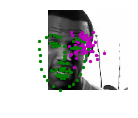

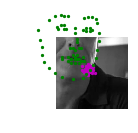

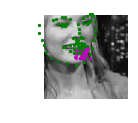

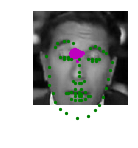

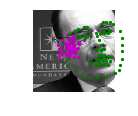

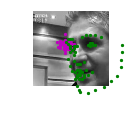

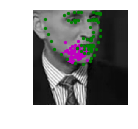

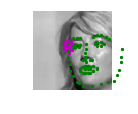

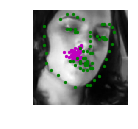

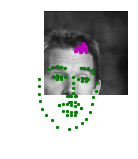

In [13]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [14]:
## TODO: Define the loss and optimization
import torch.optim as optim

device = torch.device('cpu')
# if torch.cuda.is_available():
#     device = torch.device('cuda')
#     torch.cuda.empty_cache()
    
print('We are using ' + str(device) + ' now')
    
criterion = nn.MSELoss().to(device)
net = net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)


We are using cpu now


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [15]:
def train_net(net,criterion,optimizer, n_epochs, train_loader, device,this_model_path, lossLogger=None, epoch_start=0):

    # Overall num of batches training dataset 
    tot_batch = len(train_loader)
    print(tot_batch)
    # loss logger 
    if lossLogger is None:
        lossLogger = np.zeros(n_epochs*(tot_batch//10)+1)
    elif len(lossLogger) < n_epochs*(tot_batch//10)+1 :
        temp = lossLogger
        lossLogger = np.zeros(n_epochs*(tot_batch//10)+1)
        lossLogger[:len(temp)] = temp
        
    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor).to(device)
            images = images.type(torch.FloatTensor).to(device)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics every 10 batches
            if batch_i%10 == 0:
                running_loss += loss.item()
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                lossLogger[epoch*(tot_batch//10) + batch_i//10] = running_loss/10
                running_loss = 0.0
                
        state = {'state_dict': net.state_dict(),
                 'optimizer' : optimizer.state_dict(),
                 'n_epoch': epoch, 
                 'lossLogger': lossLogger}
        torch.save(state, this_model_path)

    print('Finished Training')
    
    # plot the loss
    plt.figure()
    plt.plot(lossLogger,label=this_model_path[:-3])
    plt.ylim([0,0.4])
    plt.legend(loc='upper right')


We are using cpu now
174


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 1, Avg. Loss: 0.1625984787940979
Epoch: 1, Batch: 11, Avg. Loss: 0.16557884216308594
Epoch: 1, Batch: 21, Avg. Loss: 0.1250795841217041
Epoch: 1, Batch: 31, Avg. Loss: 0.10693866014480591
Epoch: 1, Batch: 41, Avg. Loss: 0.11201481819152832
Epoch: 1, Batch: 51, Avg. Loss: 0.11078648567199707
Epoch: 1, Batch: 61, Avg. Loss: 0.1444789171218872
Epoch: 1, Batch: 71, Avg. Loss: 0.08660019040107728
Epoch: 1, Batch: 81, Avg. Loss: 0.09950497150421142
Epoch: 1, Batch: 91, Avg. Loss: 0.0663987934589386
Epoch: 1, Batch: 101, Avg. Loss: 0.10348632335662841
Epoch: 1, Batch: 111, Avg. Loss: 0.09732939004898071
Epoch: 1, Batch: 121, Avg. Loss: 0.09207980632781983
Epoch: 1, Batch: 131, Avg. Loss: 0.07332791686058045
Epoch: 1, Batch: 141, Avg. Loss: 0.08715248703956605
Epoch: 1, Batch: 151, Avg. Loss: 0.10959517955780029
Epoch: 1, Batch: 161, Avg. Loss: 0.07778201699256897
Epoch: 1, Batch: 171, Avg. Loss: 0.059851229190826416


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 1, Avg. Loss: 0.0639929711818695
Epoch: 2, Batch: 11, Avg. Loss: 0.07552542090415955
Epoch: 2, Batch: 21, Avg. Loss: 0.07514534592628479
Epoch: 2, Batch: 31, Avg. Loss: 0.05870638489723205
Epoch: 2, Batch: 41, Avg. Loss: 0.06568237543106079
Epoch: 2, Batch: 51, Avg. Loss: 0.0633161187171936
Epoch: 2, Batch: 61, Avg. Loss: 0.09141491055488586
Epoch: 2, Batch: 71, Avg. Loss: 0.04981452524662018
Epoch: 2, Batch: 81, Avg. Loss: 0.05575787425041199
Epoch: 2, Batch: 91, Avg. Loss: 0.044406095147132875
Epoch: 2, Batch: 101, Avg. Loss: 0.04553600549697876
Epoch: 2, Batch: 111, Avg. Loss: 0.050579899549484254
Epoch: 2, Batch: 121, Avg. Loss: 0.07236037850379944
Epoch: 2, Batch: 131, Avg. Loss: 0.05744462013244629
Epoch: 2, Batch: 141, Avg. Loss: 0.06582473516464234
Epoch: 2, Batch: 151, Avg. Loss: 0.09813748598098755
Epoch: 2, Batch: 161, Avg. Loss: 0.05671956539154053
Epoch: 2, Batch: 171, Avg. Loss: 0.05144888758659363


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 1, Avg. Loss: 0.0582083523273468
Epoch: 3, Batch: 11, Avg. Loss: 0.04200729727745056
Epoch: 3, Batch: 21, Avg. Loss: 0.08230523467063904
Epoch: 3, Batch: 31, Avg. Loss: 0.07789976000785828
Epoch: 3, Batch: 41, Avg. Loss: 0.07398582696914673
Epoch: 3, Batch: 51, Avg. Loss: 0.07549163699150085
Epoch: 3, Batch: 61, Avg. Loss: 0.0827407717704773
Epoch: 3, Batch: 71, Avg. Loss: 0.04328513145446777
Epoch: 3, Batch: 81, Avg. Loss: 0.04173595607280731
Epoch: 3, Batch: 91, Avg. Loss: 0.035945546627044675
Epoch: 3, Batch: 101, Avg. Loss: 0.0484711229801178
Epoch: 3, Batch: 111, Avg. Loss: 0.04183425307273865
Epoch: 3, Batch: 121, Avg. Loss: 0.05528923273086548
Epoch: 3, Batch: 131, Avg. Loss: 0.042652052640914914
Epoch: 3, Batch: 141, Avg. Loss: 0.05594472289085388
Epoch: 3, Batch: 151, Avg. Loss: 0.04511584043502807
Epoch: 3, Batch: 161, Avg. Loss: 0.02801823914051056
Epoch: 3, Batch: 171, Avg. Loss: 0.04147253036499023


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 1, Avg. Loss: 0.03710094094276428
Epoch: 4, Batch: 11, Avg. Loss: 0.03452529311180115
Epoch: 4, Batch: 21, Avg. Loss: 0.04756928384304047
Epoch: 4, Batch: 31, Avg. Loss: 0.06347550749778748
Epoch: 4, Batch: 41, Avg. Loss: 0.04289862215518951
Epoch: 4, Batch: 51, Avg. Loss: 0.03312523663043976
Epoch: 4, Batch: 61, Avg. Loss: 0.025150898098945617
Epoch: 4, Batch: 71, Avg. Loss: 0.033800923824310304
Epoch: 4, Batch: 81, Avg. Loss: 0.03846910893917084
Epoch: 4, Batch: 91, Avg. Loss: 0.02772779166698456
Epoch: 4, Batch: 101, Avg. Loss: 0.07225164175033569
Epoch: 4, Batch: 111, Avg. Loss: 0.03367530703544617
Epoch: 4, Batch: 121, Avg. Loss: 0.05800544619560242
Epoch: 4, Batch: 131, Avg. Loss: 0.05762571692466736
Epoch: 4, Batch: 141, Avg. Loss: 0.06005263924598694
Epoch: 4, Batch: 151, Avg. Loss: 0.04476999044418335
Epoch: 4, Batch: 161, Avg. Loss: 0.060688138008117676
Epoch: 4, Batch: 171, Avg. Loss: 0.05398783683776855


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 1, Avg. Loss: 0.040243715047836304
Epoch: 5, Batch: 11, Avg. Loss: 0.06880238056182861
Epoch: 5, Batch: 21, Avg. Loss: 0.05098313093185425
Epoch: 5, Batch: 31, Avg. Loss: 0.03933678269386291
Epoch: 5, Batch: 41, Avg. Loss: 0.04668322503566742
Epoch: 5, Batch: 51, Avg. Loss: 0.040621396899223325
Epoch: 5, Batch: 61, Avg. Loss: 0.028183066844940187
Epoch: 5, Batch: 71, Avg. Loss: 0.027971768379211427
Epoch: 5, Batch: 81, Avg. Loss: 0.023045234382152557
Epoch: 5, Batch: 91, Avg. Loss: 0.055927115678787234
Epoch: 5, Batch: 101, Avg. Loss: 0.032944560050964355
Epoch: 5, Batch: 111, Avg. Loss: 0.037598511576652525
Epoch: 5, Batch: 121, Avg. Loss: 0.047195646166801455
Epoch: 5, Batch: 131, Avg. Loss: 0.07131510972976685
Epoch: 5, Batch: 141, Avg. Loss: 0.056207454204559325
Epoch: 5, Batch: 151, Avg. Loss: 0.04987087547779083
Epoch: 5, Batch: 161, Avg. Loss: 0.04023885726928711
Epoch: 5, Batch: 171, Avg. Loss: 0.0351186603307724


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 1, Avg. Loss: 0.03867492079734802
Epoch: 6, Batch: 11, Avg. Loss: 0.03897290825843811
Epoch: 6, Batch: 21, Avg. Loss: 0.0383866161108017
Epoch: 6, Batch: 31, Avg. Loss: 0.02810671329498291
Epoch: 6, Batch: 41, Avg. Loss: 0.07157521843910217
Epoch: 6, Batch: 51, Avg. Loss: 0.02723536193370819
Epoch: 6, Batch: 61, Avg. Loss: 0.0521872341632843
Epoch: 6, Batch: 71, Avg. Loss: 0.05790199041366577
Epoch: 6, Batch: 81, Avg. Loss: 0.023991061747074126
Epoch: 6, Batch: 91, Avg. Loss: 0.04330359101295471
Epoch: 6, Batch: 101, Avg. Loss: 0.022152748703956605
Epoch: 6, Batch: 111, Avg. Loss: 0.049375736713409425
Epoch: 6, Batch: 121, Avg. Loss: 0.03596251010894776
Epoch: 6, Batch: 131, Avg. Loss: 0.04358996152877807
Epoch: 6, Batch: 141, Avg. Loss: 0.039477139711380005
Epoch: 6, Batch: 151, Avg. Loss: 0.03741913139820099
Epoch: 6, Batch: 161, Avg. Loss: 0.0465072363615036
Epoch: 6, Batch: 171, Avg. Loss: 0.04149269461631775


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 1, Avg. Loss: 0.06648268103599549
Epoch: 7, Batch: 11, Avg. Loss: 0.07362779974937439
Epoch: 7, Batch: 21, Avg. Loss: 0.06273501515388488
Epoch: 7, Batch: 31, Avg. Loss: 0.04681548476219177
Epoch: 7, Batch: 41, Avg. Loss: 0.024551737308502197
Epoch: 7, Batch: 51, Avg. Loss: 0.05123711824417114
Epoch: 7, Batch: 61, Avg. Loss: 0.03027138113975525
Epoch: 7, Batch: 71, Avg. Loss: 0.03311412334442139
Epoch: 7, Batch: 81, Avg. Loss: 0.0249254047870636
Epoch: 7, Batch: 91, Avg. Loss: 0.10626058578491211
Epoch: 7, Batch: 101, Avg. Loss: 0.03484119176864624
Epoch: 7, Batch: 111, Avg. Loss: 0.024451228976249694
Epoch: 7, Batch: 121, Avg. Loss: 0.029439181089401245
Epoch: 7, Batch: 131, Avg. Loss: 0.04610724151134491
Epoch: 7, Batch: 141, Avg. Loss: 0.04181444942951203
Epoch: 7, Batch: 151, Avg. Loss: 0.03787440061569214
Epoch: 7, Batch: 161, Avg. Loss: 0.033124253153800964
Epoch: 7, Batch: 171, Avg. Loss: 0.048167330026626584


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 1, Avg. Loss: 0.06180241107940674
Epoch: 8, Batch: 11, Avg. Loss: 0.04413549602031708
Epoch: 8, Batch: 21, Avg. Loss: 0.14739229679107665
Epoch: 8, Batch: 31, Avg. Loss: 0.06869414448738098
Epoch: 8, Batch: 41, Avg. Loss: 0.07553386688232422
Epoch: 8, Batch: 51, Avg. Loss: 0.03692825138568878
Epoch: 8, Batch: 61, Avg. Loss: 0.02969459593296051
Epoch: 8, Batch: 71, Avg. Loss: 0.030655264854431152
Epoch: 8, Batch: 81, Avg. Loss: 0.042411768436431886
Epoch: 8, Batch: 91, Avg. Loss: 0.03344070315361023
Epoch: 8, Batch: 101, Avg. Loss: 0.07491642832756043
Epoch: 8, Batch: 111, Avg. Loss: 0.041536074876785276
Epoch: 8, Batch: 121, Avg. Loss: 0.032820907235145566
Epoch: 8, Batch: 131, Avg. Loss: 0.03274742066860199
Epoch: 8, Batch: 141, Avg. Loss: 0.03963345289230347
Epoch: 8, Batch: 151, Avg. Loss: 0.05795335173606873
Epoch: 8, Batch: 161, Avg. Loss: 0.03566353619098663
Epoch: 8, Batch: 171, Avg. Loss: 0.02932712435722351


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 1, Avg. Loss: 0.025414863228797914
Epoch: 9, Batch: 11, Avg. Loss: 0.033629602193832396
Epoch: 9, Batch: 21, Avg. Loss: 0.03244979381561279
Epoch: 9, Batch: 31, Avg. Loss: 0.04075402617454529
Epoch: 9, Batch: 41, Avg. Loss: 0.03783552646636963
Epoch: 9, Batch: 51, Avg. Loss: 0.035743191838264465
Epoch: 9, Batch: 61, Avg. Loss: 0.026433494687080384
Epoch: 9, Batch: 71, Avg. Loss: 0.049380290508270266
Epoch: 9, Batch: 81, Avg. Loss: 0.02935958206653595
Epoch: 9, Batch: 91, Avg. Loss: 0.03766091167926788
Epoch: 9, Batch: 101, Avg. Loss: 0.037238070368766786
Epoch: 9, Batch: 111, Avg. Loss: 0.02661847174167633
Epoch: 9, Batch: 121, Avg. Loss: 0.05067214369773865
Epoch: 9, Batch: 131, Avg. Loss: 0.04527422785758972
Epoch: 9, Batch: 141, Avg. Loss: 0.036805850267410276
Epoch: 9, Batch: 151, Avg. Loss: 0.03901633620262146
Epoch: 9, Batch: 161, Avg. Loss: 0.02189747542142868
Epoch: 9, Batch: 171, Avg. Loss: 0.01961815506219864


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 1, Avg. Loss: 0.03631139695644379
Epoch: 10, Batch: 11, Avg. Loss: 0.02341010421514511
Epoch: 10, Batch: 21, Avg. Loss: 0.04585848152637482
Epoch: 10, Batch: 31, Avg. Loss: 0.02999365031719208
Epoch: 10, Batch: 41, Avg. Loss: 0.057266467809677125
Epoch: 10, Batch: 51, Avg. Loss: 0.037951874732971194
Epoch: 10, Batch: 61, Avg. Loss: 0.02979412078857422
Epoch: 10, Batch: 71, Avg. Loss: 0.023537133634090424
Epoch: 10, Batch: 81, Avg. Loss: 0.03977876007556915
Epoch: 10, Batch: 91, Avg. Loss: 0.028304359316825865
Epoch: 10, Batch: 101, Avg. Loss: 0.13365638256072998
Epoch: 10, Batch: 111, Avg. Loss: 0.030750027298927306
Epoch: 10, Batch: 121, Avg. Loss: 0.02954312264919281
Epoch: 10, Batch: 131, Avg. Loss: 0.036469846963882446
Epoch: 10, Batch: 141, Avg. Loss: 0.03362852931022644
Epoch: 10, Batch: 151, Avg. Loss: 0.030116304755210876
Epoch: 10, Batch: 161, Avg. Loss: 0.04526281952857971
Epoch: 10, Batch: 171, Avg. Loss: 0.041004031896591187


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 1, Avg. Loss: 0.02310761660337448
Epoch: 11, Batch: 11, Avg. Loss: 0.03801475167274475
Epoch: 11, Batch: 21, Avg. Loss: 0.03600896596908569
Epoch: 11, Batch: 31, Avg. Loss: 0.051911115646362305
Epoch: 11, Batch: 41, Avg. Loss: 0.02504832446575165
Epoch: 11, Batch: 51, Avg. Loss: 0.03046385049819946
Epoch: 11, Batch: 61, Avg. Loss: 0.020551535487174987
Epoch: 11, Batch: 71, Avg. Loss: 0.03597231507301331
Epoch: 11, Batch: 81, Avg. Loss: 0.025613772869110107
Epoch: 11, Batch: 91, Avg. Loss: 0.03371795117855072
Epoch: 11, Batch: 101, Avg. Loss: 0.026843059062957763
Epoch: 11, Batch: 111, Avg. Loss: 0.08569709062576295
Epoch: 11, Batch: 121, Avg. Loss: 0.03716031014919281
Epoch: 11, Batch: 131, Avg. Loss: 0.02220195084810257
Epoch: 11, Batch: 141, Avg. Loss: 0.023472431302070617
Epoch: 11, Batch: 151, Avg. Loss: 0.04142677187919617
Epoch: 11, Batch: 161, Avg. Loss: 0.024247856438159944
Epoch: 11, Batch: 171, Avg. Loss: 0.02205478847026825


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 1, Avg. Loss: 0.029132446646690367
Epoch: 12, Batch: 11, Avg. Loss: 0.02993384897708893
Epoch: 12, Batch: 21, Avg. Loss: 0.05042662024497986
Epoch: 12, Batch: 31, Avg. Loss: 0.02273680716753006
Epoch: 12, Batch: 41, Avg. Loss: 0.0408500075340271
Epoch: 12, Batch: 51, Avg. Loss: 0.029762962460517885
Epoch: 12, Batch: 61, Avg. Loss: 0.01896516978740692
Epoch: 12, Batch: 71, Avg. Loss: 0.023567338287830353
Epoch: 12, Batch: 81, Avg. Loss: 0.038180604577064514
Epoch: 12, Batch: 91, Avg. Loss: 0.0464609295129776
Epoch: 12, Batch: 101, Avg. Loss: 0.02762404680252075
Epoch: 12, Batch: 111, Avg. Loss: 0.04169106781482697
Epoch: 12, Batch: 121, Avg. Loss: 0.04456138014793396
Epoch: 12, Batch: 131, Avg. Loss: 0.027378544211387634
Epoch: 12, Batch: 141, Avg. Loss: 0.027536997199058534
Epoch: 12, Batch: 151, Avg. Loss: 0.07965834736824036
Epoch: 12, Batch: 161, Avg. Loss: 0.039374816417694095
Epoch: 12, Batch: 171, Avg. Loss: 0.021470162272453307


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 1, Avg. Loss: 0.02828317880630493
Epoch: 13, Batch: 11, Avg. Loss: 0.03427981734275818
Epoch: 13, Batch: 21, Avg. Loss: 0.03576420545578003
Epoch: 13, Batch: 31, Avg. Loss: 0.04238543808460236
Epoch: 13, Batch: 41, Avg. Loss: 0.03656598627567291
Epoch: 13, Batch: 51, Avg. Loss: 0.023959162831306457
Epoch: 13, Batch: 61, Avg. Loss: 0.02752944827079773
Epoch: 13, Batch: 71, Avg. Loss: 0.022053952515125274
Epoch: 13, Batch: 81, Avg. Loss: 0.01709176003932953
Epoch: 13, Batch: 91, Avg. Loss: 0.03514431416988373
Epoch: 13, Batch: 101, Avg. Loss: 0.03449194133281708
Epoch: 13, Batch: 111, Avg. Loss: 0.036427026987075804
Epoch: 13, Batch: 121, Avg. Loss: 0.018878860771656035
Epoch: 13, Batch: 131, Avg. Loss: 0.03771306574344635
Epoch: 13, Batch: 141, Avg. Loss: 0.04605602025985718
Epoch: 13, Batch: 151, Avg. Loss: 0.015931668877601623
Epoch: 13, Batch: 161, Avg. Loss: 0.03600392937660217
Epoch: 13, Batch: 171, Avg. Loss: 0.023552674055099487


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 1, Avg. Loss: 0.045990556478500366
Epoch: 14, Batch: 11, Avg. Loss: 0.03773970603942871
Epoch: 14, Batch: 21, Avg. Loss: 0.027939429879188536
Epoch: 14, Batch: 31, Avg. Loss: 0.025430551171302794
Epoch: 14, Batch: 41, Avg. Loss: 0.033391284942626956
Epoch: 14, Batch: 51, Avg. Loss: 0.03776270151138306
Epoch: 14, Batch: 61, Avg. Loss: 0.02557847201824188
Epoch: 14, Batch: 71, Avg. Loss: 0.02600187957286835
Epoch: 14, Batch: 81, Avg. Loss: 0.028684991598129272
Epoch: 14, Batch: 91, Avg. Loss: 0.0408187061548233
Epoch: 14, Batch: 101, Avg. Loss: 0.025671645998954773
Epoch: 14, Batch: 111, Avg. Loss: 0.022963128983974457
Epoch: 14, Batch: 121, Avg. Loss: 0.03131383061408997
Epoch: 14, Batch: 131, Avg. Loss: 0.03689092993736267
Epoch: 14, Batch: 141, Avg. Loss: 0.027077284455299378
Epoch: 14, Batch: 151, Avg. Loss: 0.03145366907119751
Epoch: 14, Batch: 161, Avg. Loss: 0.03371299207210541
Epoch: 14, Batch: 171, Avg. Loss: 0.03884563744068146


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 1, Avg. Loss: 0.0385695606470108
Epoch: 15, Batch: 11, Avg. Loss: 0.1285747170448303
Epoch: 15, Batch: 21, Avg. Loss: 0.025249993801116942
Epoch: 15, Batch: 31, Avg. Loss: 0.03437992036342621
Epoch: 15, Batch: 41, Avg. Loss: 0.015513269603252411
Epoch: 15, Batch: 51, Avg. Loss: 0.08357632756233216
Epoch: 15, Batch: 61, Avg. Loss: 0.023657271265983583
Epoch: 15, Batch: 71, Avg. Loss: 0.027182513475418092
Epoch: 15, Batch: 81, Avg. Loss: 0.055215483903884886
Epoch: 15, Batch: 91, Avg. Loss: 0.03262168765068054
Epoch: 15, Batch: 101, Avg. Loss: 0.025164154171943665
Epoch: 15, Batch: 111, Avg. Loss: 0.03803131580352783
Epoch: 15, Batch: 121, Avg. Loss: 0.029502809047698975
Epoch: 15, Batch: 131, Avg. Loss: 0.023347757756710052
Epoch: 15, Batch: 141, Avg. Loss: 0.02170567959547043
Epoch: 15, Batch: 151, Avg. Loss: 0.039818298816680905
Epoch: 15, Batch: 161, Avg. Loss: 0.023239988088607787
Epoch: 15, Batch: 171, Avg. Loss: 0.03436585962772369
Finished Training


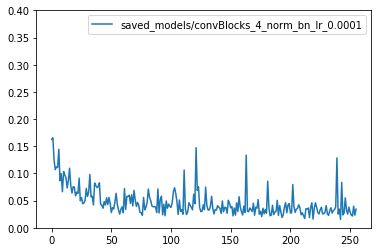

In [16]:
# train your network
n_epochs = 15 # start small, and increase when you've decided on your model structure and hyperparams
device = torch.device('cpu')
# if torch.cuda.is_available():
#     device = torch.device('cuda')
#     torch.cuda.empty_cache()

# Network structure specific parameters
# # Parameter settings (when searching for a proper model)
# norm_types = [None, 'bn','gn','in','ln'] # normalization types
# lrs        = [1e-1,1e-2,1e-3,1e-4,1e-6] # learning rates
# n_blocks   = [1,2,3,4] # num of conv_blocks
# finialized parameters
norm_types = ['bn'] # normalization types
lrs        = [1e-4] # learning rates
n_blocks   = [4] # num of conv_blocks

    
# keep notebook waked up!    
with active_session():
    for norm_type in norm_types:
        for n_block in n_blocks:
            for lr in lrs:
                net = Net(norm_type=norm_type,n_block=n_block)
                
                model_path = 'saved_models/'
                this_model_path = model_path+'convBlocks_'+str(n_block)+'_norm_'+str(norm_type)+'_lr_'+str(lr)+'.pt'

                device = torch.device('cpu')

                print('We are using ' + str(device) + ' now')

                criterion = nn.MSELoss().to(device)
                net = net.to(device)

                optimizer   = torch.optim.Adam(net.parameters(), lr=lr)
                epoch_start = 0
                lossLogger  = None

                if os.path.exists(this_model_path):
                    print('=> Loading checkpoint' + this_model_path)
                    checkpoint = torch.load(this_model_path)
                    print(checkpoint.keys())
                    net.load_state_dict(checkpoint['state_dict'])
                    optimizer.load_state_dict(checkpoint['optimizer'])
                    epoch_start = checkpoint['n_epoch']
                    if 'lossLogger' in checkpoint.keys():
                        lossLogger = checkpoint['lossLogger']

                # this is a Workspaces-specific context manager to keep the connection
                # alive while training your model, not part of pytorch

                train_net(net,criterion,optimizer, n_epochs, train_loader, device, this_model_path,epoch_start=epoch_start,lossLogger=lossLogger)


## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [17]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


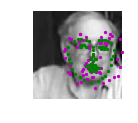

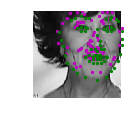

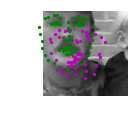

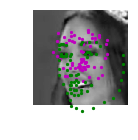

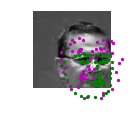

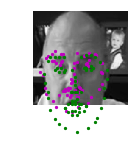

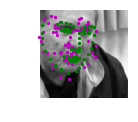

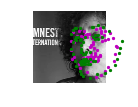

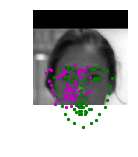

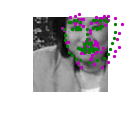

In [18]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [19]:
# ## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'convBlocks_'+str(n_block)+'_norm_'+str(norm_type)+'_lr_'+str(lr)+'.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I decided to use Adam (torch.optim.Adam) optimizer and initial learning rate as 1e-4. However this learning rate varied by different number of convolution laber block. At the end, I've tested 1e-1,1e-2,1e-3,1e-4,and 1e-6 as initial learning rate. I chose Adam as it can adapt the learning rate for each parameters over the trials by applying momentum. For the loss function, I've used mean squared error (nn.MSELoss()), to calculated the distance (L2 norm) between the predicted and the ground truth facial keypoint coordinates.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I have used miscellaneous number of convolution blocks and normalization layers to explore the best sturcture and to avoide overfitting. 

Each convolution block (conv_block) was composed of a 2d convolution layer (kernel size=3, stride=1, padding=1), a normalization layer, a activation function (ReLU), and a maxpooling layer (to get the larger receptive field in the later layers; kernel size=2, stride=2). Five different normalization types were used; they were batch normalization, group normalization, instance normalization, and layer normalization. Four different number of conv_blocks were used, 1,2,3, or 4. At the end of the conv_block, I added two fully connected layers with 136*4 hidden unit along with dropout modulations. 

I found two main changes by using different normalization layers or different number of conv_block, respectively. First, by using normalization layers, no matter batch-norm, group-norm, instance-norm, or layer-norm, the loss converged faster and I could clearly observe it from 4-conv_block networks (as shown in 'Fig1_LossLoggerPlot.png'). Then, by increasing the number of conv_blocks, I could avoid the predicted facial keypoints always being concentrated in the center of the image (overfitting). Interestingly, by having larger (more conv_blocks) networks, setting a proper inital learning rate affected training more. For example, with a huge initial learning rate (lr=0.1) in 4-conv_block network, the network was either completely un-trained or highly overfitted. 

I also transformed dataset to avoid the overfitting. Especially, the dataset was rescaled to 350x350 size and cropped into 224x224 size. With such a manipulation, I could induce certain amount of data variabilities. 

At the end, I chose 4 conv_block network with batch-norm and initial learning rate of 1e-4 network to proceed. 

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: I've started with small batch size (20) and small number of epochs (10) and then increased the number of epochs. I plotted the loss changes and stopped when the loss decrease changes were smaller than 0.001. Therefore, I used batch size = 20 and the number of epochs = 15 to train all the networks and compared as answered in the previous question. 

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
(32, 1, 3, 3)
[[ 0.27371332  0.27123624 -0.03216615]
 [ 0.2175537   0.24344373  0.18990386]
 [-0.20171177  0.14066686  0.20704108]]
(3, 3)


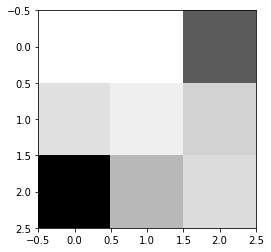

In [5]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
# finialized parameters
norm_type = 'bn' # normalization types
lr        = 1e-4 # learning rates
n_block   = 4 # num of conv_blocks

this_model_path = 'saved_models/convBlocks_'+str(n_block)+'_norm_'+str(norm_type)+'_lr_'+str(lr)+'.pt'

net = Net(norm_type=norm_type,n_block=n_block)
net.eval()
print(net.features[0].conv)

# load saved model
checkpoint = torch.load(this_model_path)
net.load_state_dict(checkpoint)

weights1 = net.features[0].conv.weight.data

w = weights1.numpy()

filter_index = 1

print(w.shape)
print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


(256, 128, 3, 3)


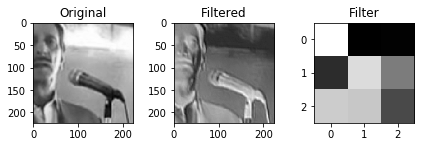

In [15]:
##TODO: load in and display any image from the transformed test dataset
# Load image from test_dataset
index = 40
image = test_dataset[index]['image'].numpy()
image = np.transpose(image, (1, 2, 0)).squeeze()   # transpose to go from torch to numpy image

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image
import cv2

def filter_and_plot(in_channel,out_channel,feature_num):
    weights = [net.features[feature_num].conv.weight.data for feature_num in range(len(net.features))]
    w = weights[feature_num].numpy()
    print(w.shape)

    output = cv2.filter2D(image, -1, w[out_channel][in_channel])

    plt.subplot(1,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.subplot(1,3,2)
    plt.imshow(output, cmap='gray')
    plt.title('Filtered')
    plt.subplot(1,3,3)
    plt.imshow(w[out_channel][in_channel], cmap='gray')
    plt.title('Filter')
    plt.tight_layout()
    

in_channel  = 20  # filter index
out_channel = 20 # filter index
feature_num = 3  # which conv_block

filter_and_plot(in_channel,out_channel,feature_num)

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: I would expect filters from higher convolution block will abstract further information, so that enable the network to detect the facial keypoints better. However, many of the filters of trained network were not highly informative. 

The example I've shown above is highlighting the darker area withregard to the surrounded bright area. Therefore, the contours between certain object (i.e. the face) and the background is easily detected. 

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!